<font 
color=blue>
# Project Final - Summary
</font>

***

### Credit Card Fraud Detection: Analysis & Modeling

This Notebook contains all the final submission work.

This below are section hyperlinks, but unfortunately this is not supported on Github.

This MVP contains:
 - [Section 1. Exploratory Data Analysis - Statistical Anlaysis](#10)
 - [Section 2. Data Preprocessing](#20)
 - [Section 3. Exloratory Data Analysis - Visualization](#30)
 - [Section 4. Summary of Findings (from EDA)](#40)
 - [Section 5. Data Preparation for Model Training](#50)
 - [Section 6. Model Performamnce Metrics](#60)
 - [Section 7. Model Training and Selection (Classification)](#70)
 - [Section 8. Summary of Findings (Predictive Modeling)](#80)
 
[Kaggle Dataset can be found here](https://www.kaggle.com/kartik2112/fraud-detection) 
  - fraudTrain.csv
  - fraudTest.csv

***
#### Future Work:
- create additional features, such as an ordinal digit representing the day number in increasing order, and a feature that detects when the cc is charged a small amount just to check that it is valid, and hten it is used by the criminal to buy goods.
- Use a Neural Network to see if it can optimize the performance

In [33]:
# Import all needed libs
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import datetime as dt
from datetime import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve,f1_score, \
                            fbeta_score, roc_auc_score, precision_recall_fscore_support, confusion_matrix
import imblearn.over_sampling

from pycaret.classification import *

In [2]:
# Reading dataset into dataframes

# The datasets were downloaded manually from Kaggle link below
# https://www.kaggle.com/kartik2112/fraud-detection
# df_Train = pd.read_csv('../project data/fraudTrain.csv')
# df_Test = pd.read_csv('../project data/fraudTest.csv')

df_Train = pd.read_csv('./fraudTrain.csv')
df_Test = pd.read_csv('./fraudTest.csv')

# remove the newly added first index column
df_Train = df_Train.drop(df_Train.columns[0], axis=1)
df_Test = df_Test.drop(df_Test.columns[0], axis=1)


# Combine the train and test data so we can split it as we wish
df_all = pd.concat([df_Train,df_Test], axis=0)

df_all.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

<a id="10"></a>
<font 
color=blue>
## Section 1. Exploratory Data Analysis - Statistical Anlaysis
</font>

In [4]:
#check column types and df shape

#print (df_Train.dtypes)
df_all.info()
#df_Train.columns

print("")
print(df_all.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [5]:
# check for any missing values

df_all.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
# print number of unique categories in 'object' columns

for i in list(df_all.select_dtypes('object').columns):
    print (i, " ", df_all[i].nunique())

trans_date_trans_time   1819551
merchant   693
category   14
first   355
last   486
gender   2
street   999
city   906
state   51
job   497
dob   984
trans_num   1852394


In [7]:
# check the basic statistics of each feature
df_all.describe().transpose()

count          mean           std           min           25%  \
cc_num      1852394.0  4.173860e+17  1.309115e+18  6.041621e+10  1.800429e+14   
amt         1852394.0  7.006357e+01  1.592540e+02  1.000000e+00  9.640000e+00   
zip         1852394.0  4.881326e+04  2.688185e+04  1.257000e+03  2.623700e+04   
lat         1852394.0  3.853931e+01  5.071470e+00  2.002710e+01  3.466890e+01   
long        1852394.0 -9.022783e+01  1.374789e+01 -1.656723e+02 -9.679800e+01   
city_pop    1852394.0  8.864367e+04  3.014876e+05  2.300000e+01  7.410000e+02   
unix_time   1852394.0  1.358674e+09  1.819508e+07  1.325376e+09  1.343017e+09   
merch_lat   1852394.0  3.853898e+01  5.105604e+00  1.902742e+01  3.474012e+01   
merch_long  1852394.0 -9.022794e+01  1.375969e+01 -1.666716e+02 -9.689944e+01   
is_fraud    1852394.0  5.210015e-03  7.199217e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
cc_num      3.521417e+15  4.642255e+15  4.992346e+18  
amt         4.745000e+01  8.310000e+01  2.894890e+04  
zip         4.817400e+04  7.204200e+04  9.992100e+04  
lat         3.935430e+01  4.194040e+01  6.669330e+01  
long       -8.747690e+01 -8.015800e+01 -6.795030e+01  
city_pop    2.443000e+03  2.032800e+04  2.906700e+06  
unix_time   1.357089e+09  1.374581e+09  1.388534e+09  
merch_lat   3.936890e+01  4.195626e+01  6.751027e+01  
merch_long -8.744069e+01 -8.024511e+01 -6.695090e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

In [8]:
# data is imbalanced (or biased) as usual for financial fraud data
# fraud transactins are only 0.52% of the data

# value count for target feature
fraud_obs = df_all['is_fraud'][df_all.is_fraud == 1].count()
legit_obs = df_all['is_fraud'][df_all.is_fraud == 0].count()

# alternative ways to get the counts of pos/neg target values
#df_all['is_fraud'].value_counts()  
#df_all.groupby('is_fraud').count()

all_obs = df_all.shape[0]

# check target possible distinct values
unique_target_val = df_all['is_fraud'].nunique()
print ("Unique target values: {}".format(unique_target_val))

print("Count of Negative target observations (Legitimate): {}".format(legit_obs))
print("Count of Positive target observations (Fraud): {}".format(fraud_obs))
print("Count of all observations: {}".format(all_obs))

print ("Percentage of fraud observations in dataset: {:.2%}".format(fraud_obs / all_obs))

Unique target values: 2
Count of Negative target observations (Legitimate): 1842743
Count of Positive target observations (Fraud): 9651
Count of all observations: 1852394
Percentage of fraud observations in dataset: 0.52%


<a id="20"></a>
<font 
color=blue>
### Section 2. Data Preprocessing
</font>

In [3]:
# Convert 'trans_date_trans_time' and 'dob' columns to datetime object

df_all['trans_date_trans_time'] = pd.to_datetime(df_all['trans_date_trans_time'])
df_all['dob'] = pd.to_datetime(df_all['dob'])

df_Train['trans_date_trans_time'] = pd.to_datetime(df_Train['trans_date_trans_time'])
df_Train['dob'] = pd.to_datetime(df_Train['dob'])
df_Test['trans_date_trans_time'] = pd.to_datetime(df_Test['trans_date_trans_time'])
df_Test['dob'] = pd.to_datetime(df_Test['dob'])

In [4]:
# slice df for only the fraud transactions
# this is to explore any interesting features in the fraud observations

df_all_fraud = df_all[df_all['is_fraud'] == 1]
df_all_fraud.head()

trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   
2523   2019-01-02 03:05:23  340187018810220            fraud_Goodwin-Nitzsche   
2546   2019-01-02 03:38:03    4613314721966            fraud_Erdman-Kertzmann   
2553   2019-01-02 03:55:47  340187018810220                fraud_Koepp-Parker   

           category     amt  first    last gender                     street  \
2449    grocery_pos  281.06  Jason  Murphy      M  542 Steve Curve Suite 011   
2472  gas_transport   11.52  Misty    Hart      F  27954 Hall Mill Suite 575   
2523    grocery_pos  276.31  Misty    Hart      F  27954 Hall Mill Suite 575   
2546  gas_transport    7.03  Jason  Murphy      M  542 Steve Curve Suite 011   
2553    grocery_pos  275.73  Misty    Hart      F  27954 Hall Mill Suite 575   

               city state    zip      lat     long  city_pop  \
2449  Collettsville    NC  28611  35.9946 -81.7266       885   
2472    San Antonio    TX  78208  29.4400 -98.4590   1595797   
2523    San Antonio    TX  78208  29.4400 -98.4590   1595797   
2546  Collettsville    NC  28611  35.9946 -81.7266       885   
2553    San Antonio    TX  78208  29.4400 -98.4590   1595797   

                           job        dob                         trans_num  \
2449            Soil scientist 1988-09-15  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant 1960-10-28  bc7d41c41103877b03232f03f1f8d3f5   
2523  Horticultural consultant 1960-10-28  b98f12f4168391b2203238813df5aa8c   
2546            Soil scientist 1988-09-15  397894a5c4c02e3c61c784001f0f14e4   
2553  Horticultural consultant 1960-10-28  7863235a750d73a244c07f1fb7f0185a   

       unix_time  merch_lat  merch_long  is_fraud  
2449  1325466397  36.430124  -81.179483         1  
2472  1325468849  29.819364  -99.142791         1  
2523  1325473523  29.273085  -98.836360         1  
2546  1325475483  35.909292  -82.091010         1  
2553  1325476547  29.786426  -98.683410         1

<a id="30"></a>
<font 
color=blue>
### Section 3. Exloratory Data Analysis - Visualization
</font>

In [368]:
# profile data using Pandas profile
# this can be either in the Statistics or Visualization sections!

# select the columns of interest as some columns cause profile to fail!!
profile = ProfileReport(df_Train.loc[:,["amt", "category", "merchant", "dob", "job", "city_pop", 
                                        "gender", "zip", "state", "lat", "long", 
                                        "merch_lat", "merch_long", "is_fraud"]])

profile

<AxesSubplot:>

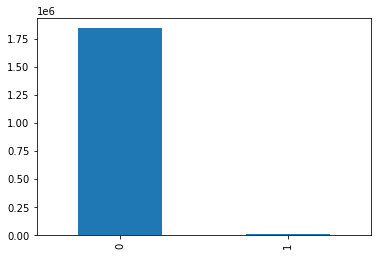

In [16]:
# bar plot showing dataset imbalance

df_all['is_fraud'].value_counts().plot.bar()

#plt.grid(b=None)

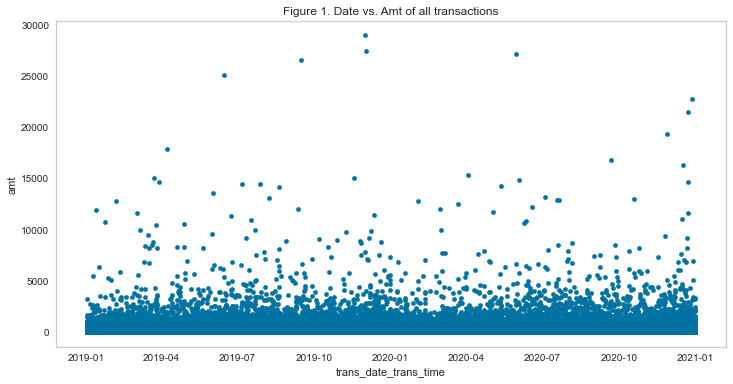

In [386]:
# chart of all data 'trans_date_trans_time' vs. 'amt'

# this import is done to remove an error regarding color, which I did not specify!
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

df_all.plot.scatter(x='trans_date_trans_time', y='amt', 
                      figsize=(12,6), title='Figure 1. Date vs. Amt of all transactions');

plt.grid(b=None)

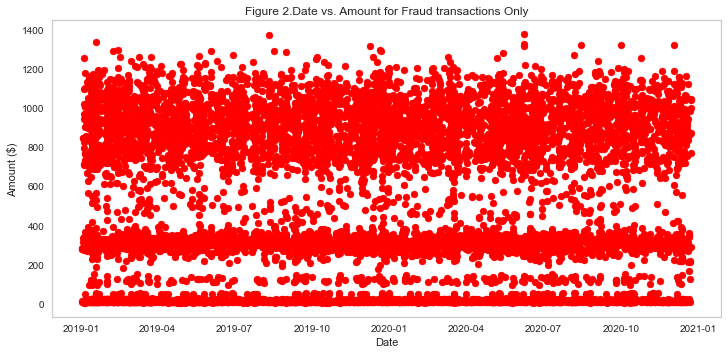

In [390]:
# chart of ONLY fraud data 'trans_date_trans_time' vs. 'amt'

plt.figure(figsize=(12,12))
ax = plt.subplot(211)

# remove grid lines
ax.grid(False)

x_axis = df_all_fraud['trans_date_trans_time']
y_axis= df_all_fraud['amt']
ax.scatter(x_axis, y_axis, color='red', label='Transactions Time vs. Mmount ')

plt.title("Figure 2.Date vs. Amount for Fraud transactions Only")
plt.xlabel("Date")
plt.ylabel("Amount ($)")

plt.show()

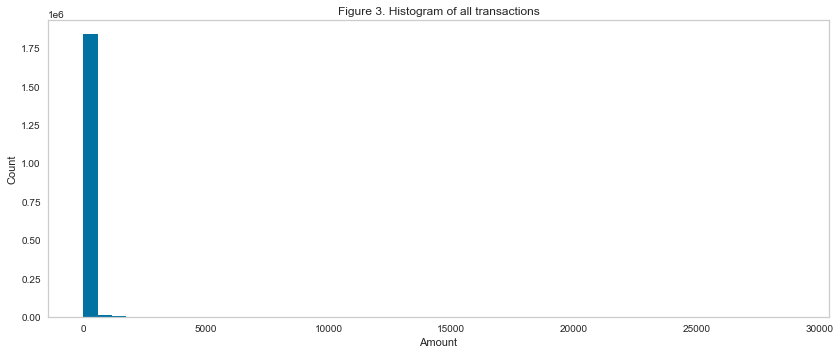

In [387]:
# histogram of all transaction 'amt'

plt.figure(figsize=(14, 12))
ax = plt.subplot(211)

# remove grid lines
ax.grid(False)

bins=50

ax.hist(df_all['amt'], bins, label='Transactions Time vs. Mmount ')

plt.title("Figure 3. Histogram of all transactions")
plt.xlabel("Amount")
plt.ylabel("Count")

plt.show()

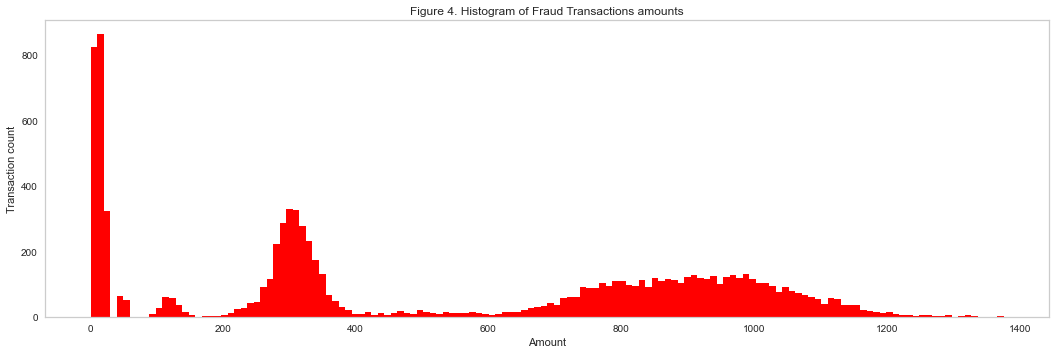

In [404]:
# histogram of ONLY fraud data 'amt'

plt.figure(figsize=(18,12))
ax = plt.subplot(211)

# remove grid lines
ax.grid(False)

bins=140

ax.hist(df_all_fraud['amt'], bins, color='red', label='Transactions Time vs. Mmount ')

plt.title("Figure 4. Histogram of Fraud Transactions amounts")
plt.xlabel("Amount")
plt.ylabel("Transaction count")

plt.show()

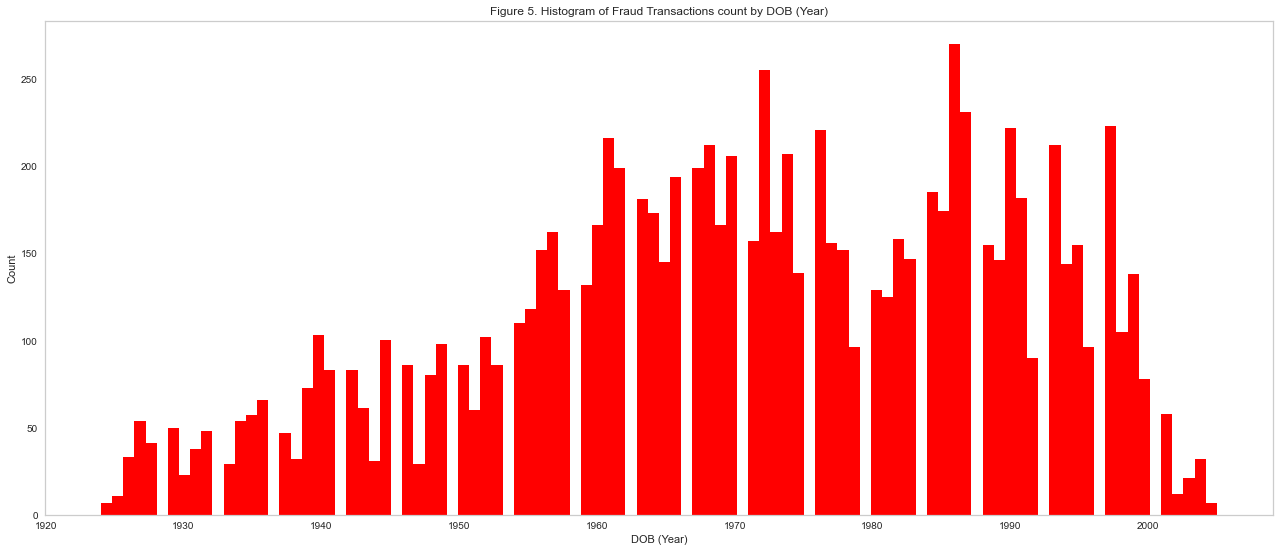

In [405]:
# chart of ONLY fraud data transactiopn count according to DOB as a histogram

plt.figure(figsize=(22,20))
ax = plt.subplot(211)

# remove grid lines
ax.grid(False)

bins=100

ax.hist(df_all_fraud['dob'].dt.year, bins, color='red', label='Transactions Time vs. Mmount ')

plt.title("Figure 5. Histogram of Fraud Transactions count by DOB (Year)")
plt.xlabel("DOB (Year)")
plt.ylabel("Count")

plt.show()

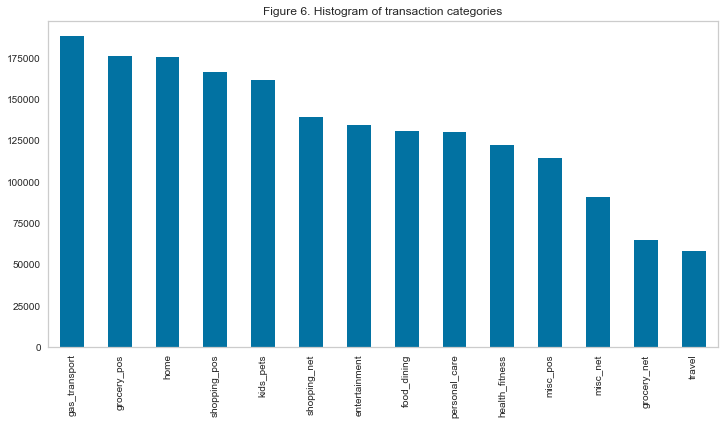

In [407]:
# bar plot for categorical feature 'category'

df_all['category'].value_counts().plot.bar(figsize=(12,6),
                    title="Figure 6. Histogram of transaction categories");

# remove grid lines
plt.grid(b=None)

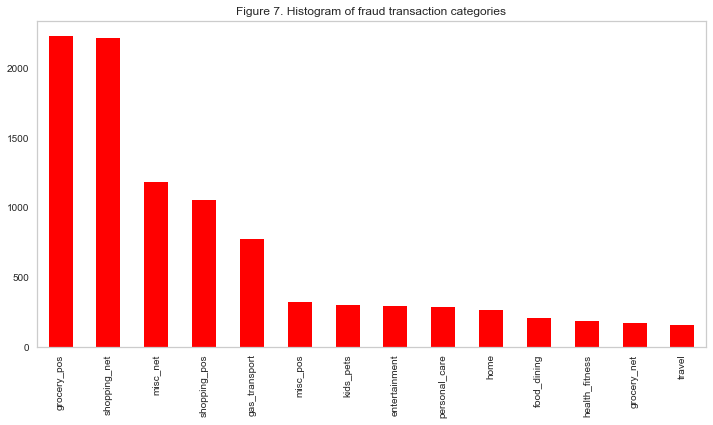

In [408]:
# bar plot for 'category' of only Fraud transaction

df_all_fraud['category'].value_counts().plot.bar(figsize=(12,6), color='red',
                title="Figure 7. Histogram of fraud transaction categories");

# remove grid lines
plt.grid(b=None)

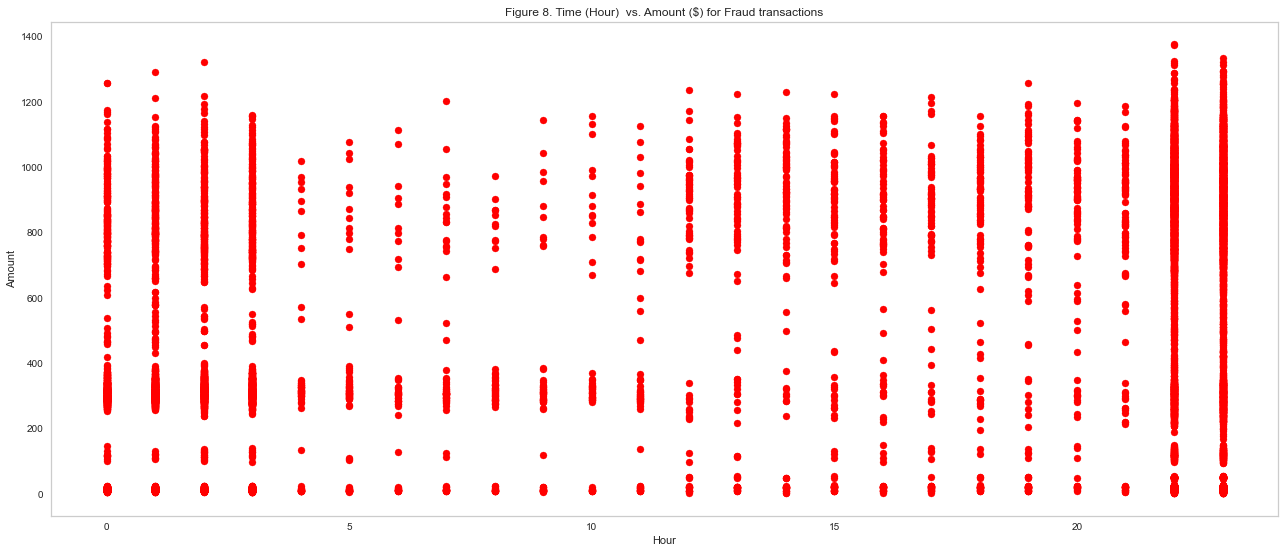

In [409]:
# Chart of fraud data Time/Hour vs. Amount

plt.figure(figsize=(22,20))
ax = plt.subplot(211)

# remove grid lines
ax.grid(False)

x_axis = df_all_fraud['trans_date_trans_time'].dt.hour
y_axis = df_all_fraud['amt']
ax.scatter(x_axis, y_axis, label='Transactions Time (Hour) vs. Amount ', color='red')

plt.title("Figure 8. Time (Hour)  vs. Amount ($) for Fraud transactions")
plt.xlabel("Hour")
plt.ylabel("Amount")

plt.show()

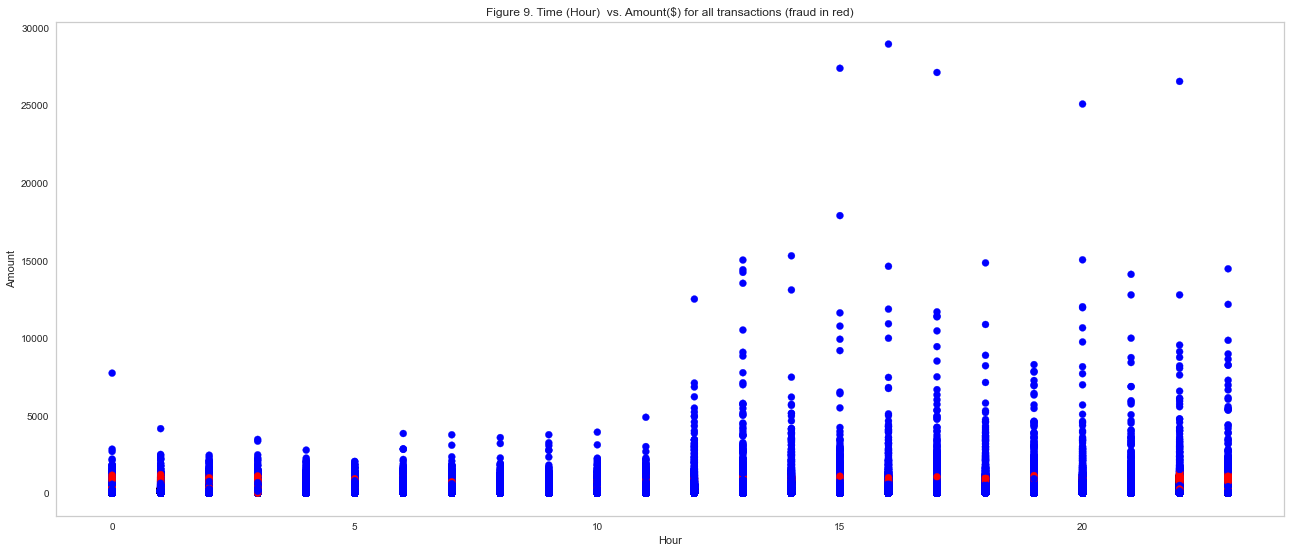

In [413]:
# Chart of all data Time/Hour vs. Amount, with the fraud data tansactions in Red color

plt.figure(figsize=(22,20))
ax = plt.subplot(211)

# remove grid lines
ax.grid(False)

# I am selecting only to plot df_train as it has less data which will show the 'fraud' points more clearly
colormap = np.array(['blue', 'red'])
colors = df_Train['is_fraud']
x_axis = df_Train['trans_date_trans_time'].dt.hour
ax.scatter(x_axis, df_Train['amt'], c=colormap[colors], label='Transactions Time vs. Amount ')

plt.title("Figure 9. Time (Hour)  vs. Amount($) for all transactions (fraud in red)")
plt.xlabel("Hour")
plt.ylabel("Amount")

plt.show()

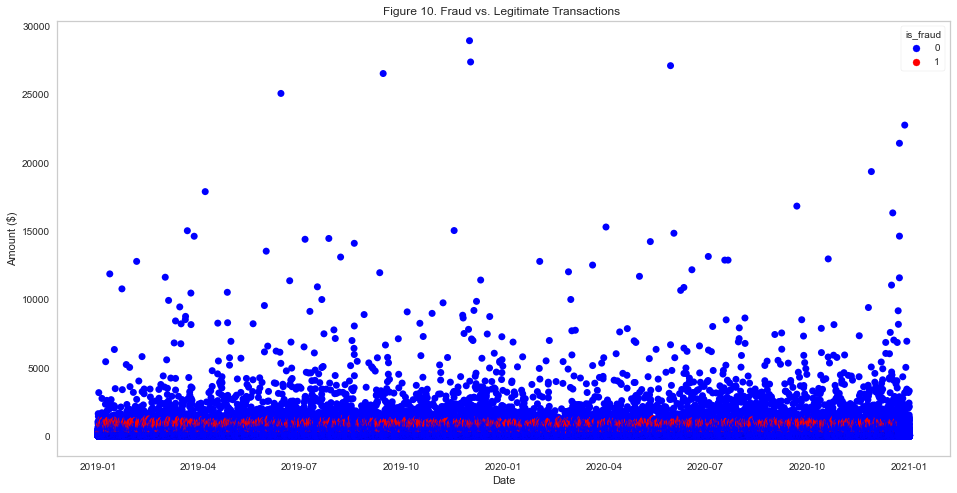

In [449]:
# Chart of Date vs. Amount, with the fraud data tansactions in Red color

sns.color_palette("dark")
plt.figure(figsize=(16,8))
plt.title("Figure 10. Fraud vs. Legitimate Transactions ")
plt.xlabel("Date")
plt.ylabel("Amount ($)")

colors = df_all['is_fraud']
x_axis = df_all['trans_date_trans_time']
y_axis= df_all['amt']

#legend = ax.legend(handles=[df_Train['is_fraud']], labels=['Fraud', 'Legit'])
#ax.add_artist(legend)
#plt.legend(title='is_fraud', loc='upper left', labels=['Fraud', 'Legit'])

sns.scatterplot(x=x_axis, y=y_axis, hue=colors, linewidth=0, alpha = 1.0, palette=['blue', 'red'], \
                edgecolor="none")

plt.legend(title='is_fraud', frameon=True)

# remove grid lines
plt.grid(b=None)

plt.show()

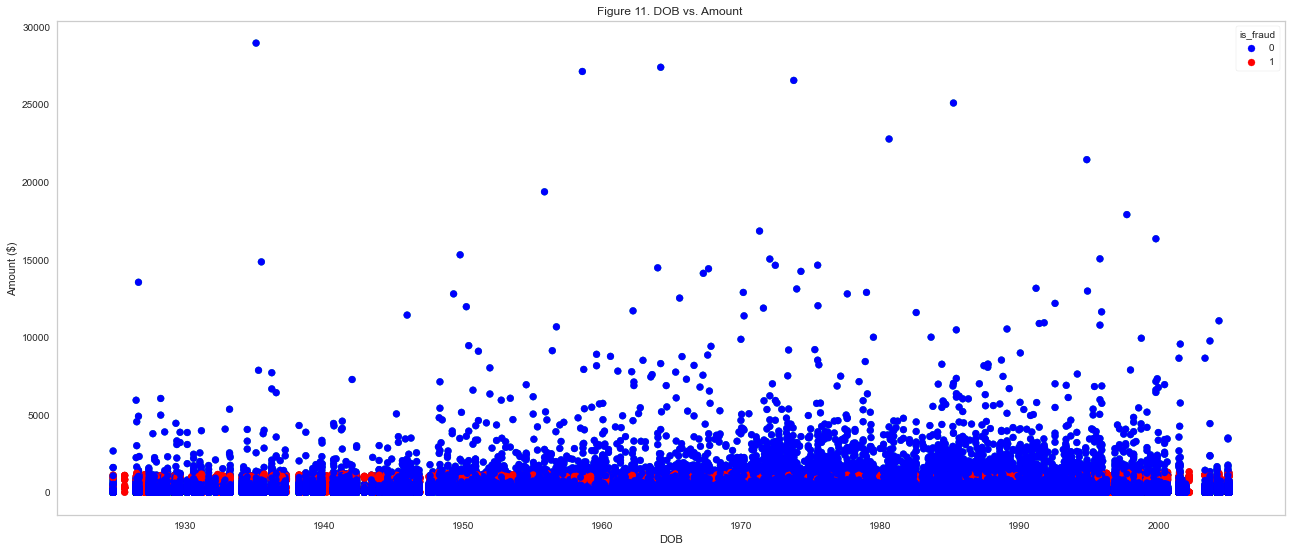

In [451]:
# Chart of DOB vs. Amount, with the fraud data tansactions in Red color

sns.color_palette("dark")
plt.figure(figsize=(22,20))
ax = plt.subplot(211)

colormap = np.array(['b', 'r'])
colors = df_all['is_fraud']
x_axis = df_all['dob']
y_axis= df_all['amt']
ax.scatter(x_axis, y_axis, c=colormap[colors])

plt.title("Figure 11. DOB vs. Amount ")
plt.xlabel("DOB")
plt.ylabel("Amount ($)")


sns.scatterplot(x=x_axis, y=y_axis, hue=colors, linewidth=0, alpha = 1.0, palette=['blue', 'red'], \
                edgecolor="none")

plt.legend(title='is_fraud', frameon=True)

# remove grid lines
plt.grid(b=None)

plt.show()

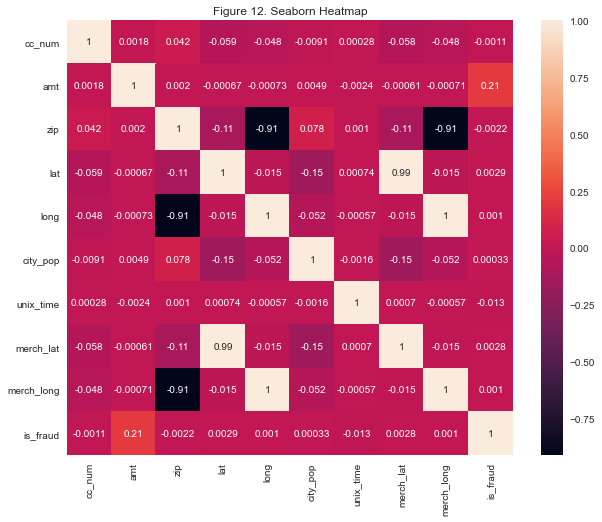

In [453]:
# sns heatmap of all features

Train_corr = df_all.corr()
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Figure 12. Seaborn Heatmap")


sns.heatmap(Train_corr, annot=True);
#sns.clustermap(Train_corr, cmap="coolwarm")

<a id="40"></a>
<font 
color=blue>
### Section 4. Summary of Findings (from EDA)
</font>

- From Figures (8, 9),  we can see that fraud transaction occur mostly off-hours, between 3pm - 3am, but the majority of them occur between 10pm - 3am daily.  This is when card owners are likely sleeping and therefore will not react quickly to the charges giving the criminals more time for making extra charges on the stolen cards.


- From Figures (2,3,4), we can see that fraud transactions occur in specific amount bands, such as:
    $\$$1-20, $\$$200-400, and $\$$700-1200, and the majority of farud transactions are in the $\$$1-20.  Figure 3 shows that the majority of charge amount is actualy between $\$$0-2, which can be interpreted as criminals testing the stolen cards first with small amount to make sure the credit card is valid and active.  This is an interesting behaviour that the model should be able to learn from to predict fraudulent transactions.  Also the all fraud transaction amount did not exceed about 1500, which is about the check amount for pensioners, so as not to run over their monthly income (Very considerate criminals :) )


- From Figure 11, we can see a very interesting behaviour especially for senior citizens that there are only fraud transactions against their credit cards!! This could be a scam where scammers through phishing can get credit card companies to issue cards for senior citizens without their knowledge (mail credit card scams, or phishing for their personal data and using it to request a reissue of their credit cards).  This may also mean that there are fraud credit card charges for some people taht have already passed away! (birth year was around 1925).


- Figure 5 shows that criminals do not discriminate against age of victims, they will hit anyone they can, but frequency of the age of the victims are mostly centered around middle age people, which makes sense as they are probably spending more and therefore using their credit cards more than the other age groups.


- Figure 7 shows that the majority of the categories that criminals bought using the stolen credit cards are either "grocery_pos" and "shopping_net'.  So criminals are using these stolen credit cards to buy their groceries in with Point of Sale machines/casheris (in-person shopping).  I found this behaviour surprising as I thought it will be mostly internet shopping (e-commerce, but this is the next most common category.



- From Figure (12,13) there does not seem to be a high correlation between features and the target.


- Before converting 'trans_date_trans_time' to datetime object, plotting using this feature took a lot of time and memory resources!


- I started plotting using Plotly which generates interactive charts.  The charts generated using plotly once generated consumed heavy memory resources which eventually caused may laptop to freeze.  I then switched to matplotlib/Seaborn.


<a id="50"></a>
<font 
color=blue>
### Section 5. Data Preparation for Model Training
</font>

Prepare the data for Model training, mainly split the train/test and select the initial feature set.

In [5]:
# Create train/test split

# first combine the train and test data so we can split it as we wish (done before)
#df_all = pd.concat([df_Train,df_Test], axis=0)

# X = df_all.loc[:, df_all.columns!='is_fraud'] # another way to remove 'is_fraud' without dropping it
# X = df_all.copy()
# X.drop(['is_fraud'], axis=1, inplace=True)

X = df_all.drop(['is_fraud'], axis=1)  # this will not drop 'is_farud' from df_all
#y = df_all.pop('is_fraud')            # this will drop 'is_farud' from df_all!
y = df_all['is_fraud']

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [6]:
# create just a subset of the df with the categories of interest (remove Categorical features)

X_train_subset = X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
X_test_subset = X_test[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]

In [7]:
# create just a subset of the df with the categories of interest (remove Categorical features)

X_train_subset_cat = X_train[['amt', 'category', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
X_test_subset_cat = X_test[['amt', 'category', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]

In [8]:
# create a very small subset to match the features provided to Pycaret

# X_train_subset_min_feat = X_train[['amt', 'city_pop', 'unix_time']]
X_train_subset_min_feat = X_train[['amt', 'category']]
X_test_subset_min_feat   = X_test[['amt', 'category']]

In [9]:
# create similar subset of features similar to the ones provided to PyCaret 
# This it to debug the KNN high performance!

X_train_subset_pycaret_feat = X_train[['cc_num', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
X_test_subset_pycaret_feat = X_test[['cc_num', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]

<a id="60"></a>
<font 
color=blue>
### Section 6. Model Performance Metrics
#### Definitions and Selection (Classification metrics for Imbalanced dataset)
</font>

---


As noted previously, I will be creating a clssification model using an imbalanced dataset, and therefore measuring the model performane using Precision/Recall is more appropriate in this case as oopsed to Accuracy for example.

<font 
color=red>
Additionally I will create a new metric, which I will call **LTPFR** (Legitimate Transactions Predicted as Fraud Rate).   LTPFR is important IMHO in this case, because we really want the Bank (or credit card provider) to flag most of the fraud transactions (Precision), while at the same time not flagging many legitimate transactions as fraud, otherwise this will cause a very low satisfaction for the customer if his legitimate transactions are blocked by the bank and possibly having his credit card frozen, and especially in cases where the customer is travelling and does not have other many other alternatives payment methods.
(See LTPFR Formula in definitions below). 
</font>

Metrics Definitions (from class Notes):

- **Precision:** The fraction of postive predictions you made that were correct. 
  High precision means that if your model predicted a positive case, you believe it with high confidence. It doesn't tell us how many postive cases we missed (i.e. it doesn't tell us how sure we are about the cases we predicted were negative).
- **Recall**: The fraction of positive cases you predicted correctly.
  High recall means that you are confident that you didn't miss any positive cases. 
  
- **F1 score**: balancing precision vs. recall

    To gauge that we have a good balance between Precision/recall we look at the $F_1$ score: 


- **ROC curve**: plot our models with different thresholds on the same chart and get a ROC curve. This curve plots the *true positive rate* on the y axis, and the *false positive rate* on the x axis. 

    The intepretation of the _Area Under the Curve_ (AUC) is the probability that a randomly chosen positive example (in this case, fraud) has a higher score than the randomly chosen negative example (in this case, legitimate transactions).

    We see here all the possible TPRs and FNRs that we could have. It is a nice metric because looking at the behavior of our model, we can choose later what we want the threshold to be.
    
    
- **LTPFR**: (Legitimate Transactions Predicted as Fraud Rate):
$$ \text{LTPFR} = \frac{\text{False positives}}{\text{False positives} + \text{True negatives}}$$

In [10]:
# create function to output the metrics of interest

def print_metrics(model_name):
    print ('============================================')
    print ('  {} Performance Metrics '.format(model_name))
    print ('============================================')

    # Accuracy = (TP+TN)/(TP+FP+FN+TN)
    accuracy = accuracy_score(y_test, y_predict)
    print('Accuracy: %f' % accuracy)
    #print("Accuracy for {} is: {:.6f}".format(model, accuracy))

    # Precision = TP/(TP+FP)
    precision = precision_score(y_test, y_predict)
    print('Precision: %f' % precision)

    # Recall = TP/(TP+FN)
    recall = recall_score(y_test, y_predict)
    print('Recall: %f' % recall)

    # F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    f1 = f1_score(y_test, y_predict)
    print('F1 score: %f' % f1)
    
    # AUC score
    auc = roc_auc_score(y_test, y_predict)
    print('AUC score: %f' % auc)

In [11]:
# Formula for % of Legitimate transactions that were incorrectly Predicted as Fraud = fp / (fp + tn)
# I am creating a new metric LTPFR (Legitimate Transactions Predicted as Fraud Rate)

def print_metrics_LTPFR(conf_mat):   
    fp = conf_mat[0][1]
    tn = conf_mat[0][0]
    ltpfr =  fp / (fp + tn)
    print ("LTPFR (fp/(fp+tn): {0:.3f}%".format(ltpfr * 100))

In [12]:
# define function to plot the confusion matric
# I am using this from class-provided notebooks, but making it genric for any X_test and y_predict

def make_confusion_matrix(model, X_test, y_predict, threshold=0.5):
#def make_confusion_matrix(model, X_test, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

<a id="70"></a>
<font 
color=blue>
### Section 7. Predictive Modeling (Classification)
</font>

I created multiple classification algorithms:
 - Logistic Regression (created initially to establish a base line)
 - Random Forests (created next as LR has failed completely, despite high accuracy)
 - Ran PyCaret to generate best model
 - KNN as it was initially given as the best model by PyCaret, but this was due to an interesting case of overfitting on a specific feature (will elaborate on this in the Findings section) 
 - Focused on Xgboost, since it was the best model by PyCaret

In [25]:
# Create Logistic Regression model and output accuracy

clf_lr = LogisticRegression(random_state=10)
#clf_lr = LogisticRegression(solver='liblinear', random_state=10)
clf_lr.fit(X_train_subset, y_train)

y_predict = clf_lr.predict(X_test_subset)
clf_lr.predict_proba(X_test_subset)

clf_lr.score(X_train_subset, y_train)
print("Logistic Accuracy score: {:6.4f}".format(clf_lr.score(X_train_subset,y_train)))

Logistic Accuracy score: 0.9948


  Logistic Regression Performance Metrics 
Accuracy: 0.994828
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
AUC score: 0.500000
LTPFR (fp/(fp+tn): 0.000%


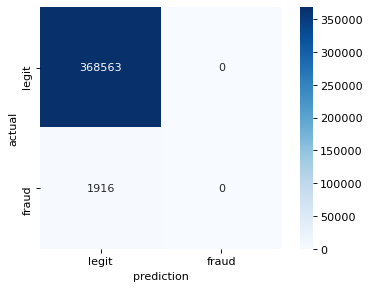

In [26]:
# print metrics

#f1_score(y_test, y_predict)
conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('Logistic Regression')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_lr, X_test_subset, y_predict)

In [489]:
# create a Random Forest model

clf_rf = RandomForestClassifier(random_state=10)
clf_rf.fit(X_train_subset, y_train)

# predict on rf
y_predict = clf_rf.predict(X_test_subset)

  Random Forest Performance Metrics 
Accuracy: 0.996243
Precision: 0.772349
Recall: 0.387787
F1 score: 0.516331
AUC score: 0.693596
LTPFR (fp/(fp+tn): 0.059%


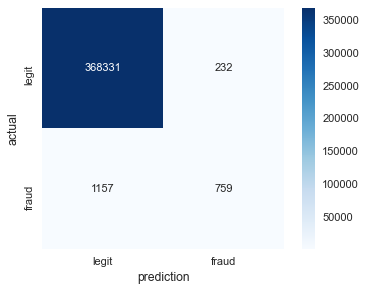

In [490]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('Random Forest')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_rf, X_test_subset, y_predict)

In [ ]:
############################# The KNN overfitting on 'cc_num' problem ################################

In [563]:
# run PyCaret on the non-categrgorical features of the combined dataset (include 'cc_num')
# This will produce fault results as KNN will overfit on the cc_num and produce high precision/recall!!
# The problem here is that I did not ignore cc_num thinking that it cannot hurt the models, but it really 
# throws KNN off and KNN overfits on this feature because it has seen the credit card number being used
# in fraud transactions, so it is sort of a "data leak"!

s = setup(df_all, target = 'is_fraud', 
          train_size = 0.8,
          ignore_features = ['trans_date_trans_time', 'trans_num', 'merchant','first', 'last', \
                             'gender', 'dob', 'street', 'city', 'state', 'zip', 'lat', 'long', \
                             'merch_lat', 'merch_long', 'job', 'category'], session_id = 10)

In [564]:
%%time
# Get the best models from PyCaret and time the run

# compare and print metrics for all models
best_model = compare_models()

CPU times: user 10.3 s, sys: 12.4 s, total: 22.8 s
Wall time: 8h 18min 21s


In [495]:
# # create a KNN model using just the same features used in initial run of Pycaret
# features include 'cc_num'
# this causes KNN to overfit on this feature and produce bogus high performance metrics!!

#clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn_cc_num = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

clf_knn_cc_num.fit(X_train_subset_pycaret_feat, y_train)
y_predict = clf_knn_cc_num.predict(X_test_subset_pycaret_feat)

  KNN_cc_num_Problem Performance Metrics 
Accuracy: 0.998545
Precision: 0.825840
Recall: 0.910752
F1 score: 0.866220
AUC score: 0.954877
LTPFR (fp/(fp+tn): 0.100%


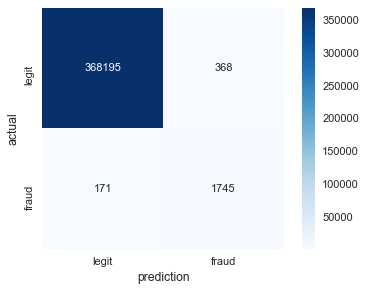

In [497]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('KNN_cc_num_Problem')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_knn_cc_num, X_test_subset_pycaret_feat, y_predict)

In [ ]:
############################# END of the KNN overfitting on 'cc_num' problem ################################

In [491]:
# create a KNN model to  check why it was the best model given by Pycaret initial run!

# It turns out that when using cc_num it overfits on this feature,
#      and can then generates very high performance metrics but they are bogus
#      and when removing the cc_num features, KNN as expected under performs 

#clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

clf_knn.fit(X_train_subset, y_train)
y_predict = clf_knn.predict(X_test_subset)

  KNN Performance Metrics 
Accuracy: 0.994780
Precision: 0.477041
Recall: 0.097599
F1 score: 0.162045
AUC score: 0.548521
LTPFR (fp/(fp+tn): 0.056%


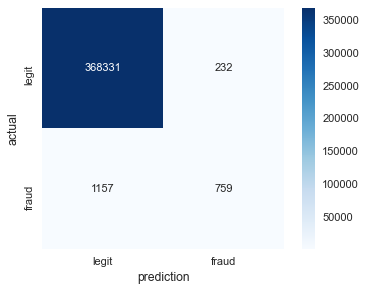

In [492]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('KNN')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_rf, X_test_subset, y_predict)

In [150]:
# run PyCaret on the non-categrgorical features of the combined dataset  (exclude cc_num)
# This does not include the 'category' feature, so it is not the best run.

s = setup(df_all, target = 'is_fraud', 
          train_size = 0.7,
          ignore_features = ['trans_date_trans_time', 'cc_num', 'trans_num', 'merchant','first', 'last', \
                             'gender', 'dob', 'street', 'city', 'state', 'zip', 'lat', 'long', \
                             'merch_lat', 'merch_long', 'job', 'category'], session_id = 10)

#high_cardinality_features = ['',']

In [151]:
%%time
# Get the best models from PyCaret and time the run

# compare and print metrics for all models
best_model = compare_models()

CPU times: user 1min 24s, sys: 5.09 s, total: 1min 30s
Wall time: 26min 24s


In [152]:
# run Cross Validation on best model to get the bet hyperparameters

#print(best_model)

# tune best model
tuned_best_model = tune_model(best_model)

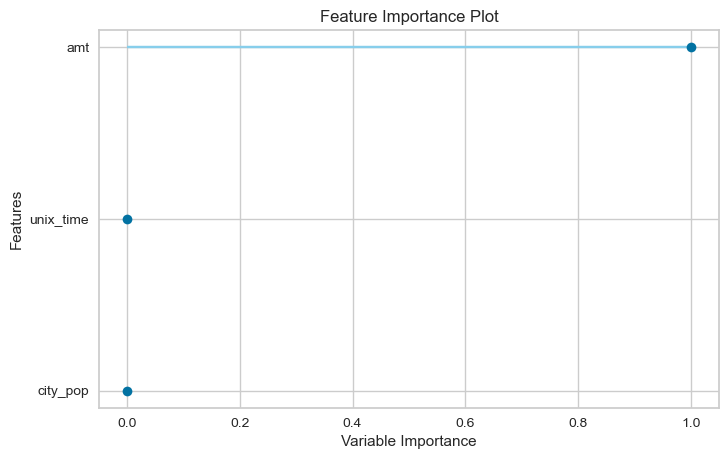

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=3, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0005, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=-1,
                     oob_score=False, random_state=10, verbose=0,
                     warm_start=False)


In [153]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

print (tuned_best_model)

In [47]:
# Pycaret and include the 'category' Categorical feature (as the onlhy categorical feature)

s = setup(df_all, target = 'is_fraud', 
          train_size = 0.8,
          ignore_features = ['trans_date_trans_time', 'cc_num', 'trans_num', 'merchant','first', 'last', \
                             'gender', 'dob', 'street', 'city', 'state', 'zip', 'lat', 'long', \
                             'merch_lat', 'merch_long', 'job'], session_id = 10)

In [48]:
%%time
# Get the best models from PyCaret and time the run

best_model = compare_models()

CPU times: user 4min 43s, sys: 25.3 s, total: 5min 8s
Wall time: 1h 49min 45s


In [156]:
# print hyperparameters of the best model

print(best_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


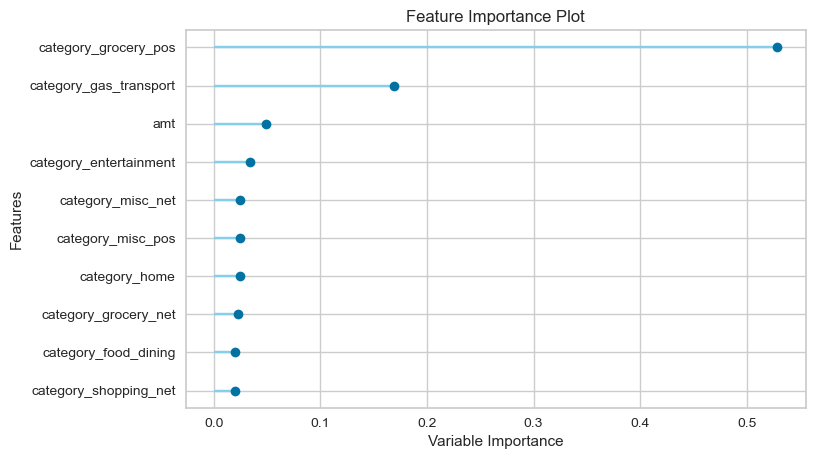

In [157]:
# Feature Importance Plot

plot_model(best_model, plot = 'feature')

In [158]:
# print best_model parameters

# tune best model
tuned_best_model = tune_model(best_model)

In [159]:
print (tuned_best_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=210, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=1e-07,
              reg_lambda=2, scale_pos_weight=1.5, subsample=0.7,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)


In [49]:
# Pycaret 

evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
from pycaret.classification import *
interpret_model(best_model)

In [ ]:
###################################### Focus on XGBOOST  ##########################################

In [ ]:
# Feature Transformation/Engineering sections below for each xgboost model

In [13]:
# Apply one-hot encoder to selected 'category' categorical feature

# creating instance of oneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# convert the category to one hot encoding
one_hot_enc_cols_train_df = pd.DataFrame(one_hot_enc.fit_transform(X_train_subset_cat[['category']]))
one_hot_enc_cols_test_df = pd.DataFrame(one_hot_enc.transform(X_test_subset_cat[['category']]))

# One-hot encoding has removed the index, so this puts it back
one_hot_enc_cols_train_df.index = X_train_subset_cat.index
one_hot_enc_cols_test_df.index = X_test_subset_cat.index

# Remove categorical columns (they have been replaced with one-hot encoding)
X_train_subset_1hot_tmp = X_train_subset_cat.drop('category', axis=1)
X_test_subset_1hot_tmp = X_test_subset_cat.drop('category', axis=1)

# Add one-hot encoded columns to the df (both train and test, otherwise predict will fail)
X_train_subset_1hot = pd.concat([X_train_subset_1hot_tmp, one_hot_enc_cols_train_df], axis=1)
X_test_subset_1hot = pd.concat([X_test_subset_1hot_tmp, one_hot_enc_cols_test_df], axis=1)
X_train_subset_1hot

amt      lat     long  city_pop  merch_lat  merch_long  \
597418    87.15  44.5232 -86.2061       680  44.540988  -86.279478   
429834   910.52  36.8347 -84.4436      1565  37.767985  -84.800707   
954760    76.16  40.7320 -73.1000      4056  40.872604  -72.428935   
1131102  115.83  34.2853 -91.3336      5161  34.857499  -91.229256   
542599     6.83  41.0442 -73.9609      5950  41.263654  -73.353803   
...         ...      ...      ...       ...        ...         ...   
1241052   73.86  40.8618 -85.6067      2304  39.904200  -85.854011   
1066306  100.51  42.8223 -83.2829     24840  42.390855  -82.845698   
28030    227.70  36.3011 -91.5281      4726  35.875358  -92.037428   
277869    78.12  39.8153 -91.2627      1656  39.367346  -90.924467   
773630   186.80  38.9462 -94.9714      5760  39.160804  -95.236782   

          unix_time    0    1    2    3    4    5    6    7    8    9   10  \
597418   1347269937  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
429834   1386150400  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
954760   1358539788  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1131102  1366062207  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
542599   1388268829  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1241052  1370097252  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1066306  1363595019  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
28030    1326788990  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
277869   1337282988  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
773630   1354012196  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

          11   12   13  
597418   0.0  0.0  0.0  
429834   0.0  0.0  0.0  
954760   0.0  0.0  0.0  
1131102  0.0  0.0  0.0  
542599   0.0  0.0  0.0  
...      ...  ...  ...  
1241052  0.0  0.0  0.0  
1066306  0.0  0.0  0.0  
28030    0.0  0.0  0.0  
277869   0.0  0.0  0.0  
773630   0.0  0.0  0.0  

[1481915 rows x 21 columns]

In [501]:
# train xgboost model using Pycaret best model parameters
# I found out that running with defult parameters actually produces the best results but are very close to tuned.
from numpy import nan

clf_xgboost = XGBClassifier(random_state=10)

# best Hyper Parameters from Pycaret best model below
# clf_xgboost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#               min_child_weight=1, missing=nan, monotone_constraints='()',
#               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
#               objective='binary:logistic', random_state=10, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
#               use_label_encoder=True, validate_parameters=1, verbosity=0)

#best Hyper Parameters from Pycaret best_tuned model below
# clf_xgboost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.3, max_delta_step=0, max_depth=4,
#               min_child_weight=3, missing=nan, monotone_constraints='()',
#               n_estimators=210, n_jobs=-1, num_parallel_tree=1,
#               objective='binary:logistic', random_state=10, reg_alpha=1e-07,
#               reg_lambda=2, scale_pos_weight=1.5, subsample=0.7,
#               tree_method='auto', use_label_encoder=True, validate_parameters=1,
#               verbosity=0)


#clf_xgboost.fit(X_train_subset, y_train)
clf_xgboost.fit(X_train_subset_1hot, y_train)
y_predict = clf_xgboost.predict(X_test_subset_1hot)

print(clf_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)


  Xgboost_v1 Performance Metrics 
Accuracy: 0.997833
Precision: 0.849780
Recall: 0.705637
F1 score: 0.771029
AUC score: 0.852494
LTPFR (fp/(fp+tn): 0.065%


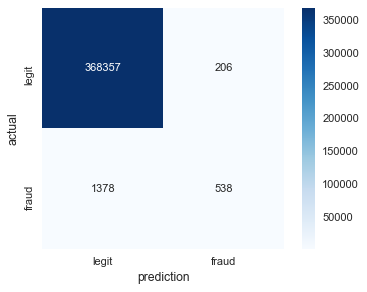

In [502]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('Xgboost_v1')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_xgboost, X_test_subset, y_predict)

In [ ]:
############### feature engineering - adding a new feature 'hour' ###############

In [14]:
# create a new subset slice including the Date object this time (as different from X_train_subset)

# create just a subset of the df with the categories of interest only
# channged X_train_subset_2 to 
X_train_subset_hour_ft = X_train[['trans_date_trans_time', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
X_test_subset_hour_ft = X_test[['trans_date_trans_time', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]


# add a new feature 'hour' and remove the 'trans_date_trans_time' feature.

X_train_subset_hour_ft['hour'] = X_train_subset_hour_ft['trans_date_trans_time'].dt.hour
X_test_subset_hour_ft['hour'] = X_test_subset_hour_ft['trans_date_trans_time'].dt.hour

#X_train_subset_2 = X_train_subset_2.drop(X_train_subset_2['trans_date_trans_time'], axis=1)
X_train_subset_hour_ft.pop('trans_date_trans_time') 
X_test_subset_hour_ft.pop('trans_date_trans_time') 

X_train_subset_hour_ft.isnull().sum()

X_train_subset_hour_ft.head()

amt      lat     long  city_pop  merch_lat  merch_long  \
597418    87.15  44.5232 -86.2061       680  44.540988  -86.279478   
429834   910.52  36.8347 -84.4436      1565  37.767985  -84.800707   
954760    76.16  40.7320 -73.1000      4056  40.872604  -72.428935   
1131102  115.83  34.2853 -91.3336      5161  34.857499  -91.229256   
542599     6.83  41.0442 -73.9609      5950  41.263654  -73.353803   

          unix_time  hour  
597418   1347269937     9  
429834   1386150400     9  
954760   1358539788    20  
1131102  1366062207    21  
542599   1388268829    22

In [506]:
#xgboost with hour as a new added feature (feature engineering)

# fit model on training data
clf_xgboost_hour = XGBClassifier()
clf_xgboost_hour.fit(X_train_subset_hour_ft, y_train)

y_predict = clf_xgboost_hour.predict(X_test_subset_hour_ft)

  Xgboost_v2 Performance Metrics 
Accuracy: 0.996980
Precision: 0.836855
Recall: 0.516701
F1 score: 0.638916
AUC score: 0.758089
LTPFR (fp/(fp+tn): 0.052%


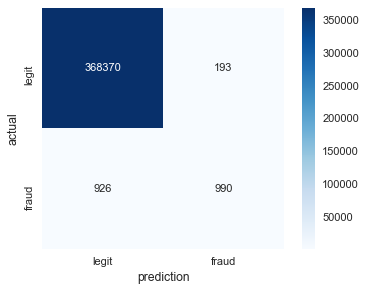

In [507]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('Xgboost_v2')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_xgboost_hour, X_test_subset_hour_ft, y_predict)

In [15]:
# create a new df with 'category' one-hot encoded and the newly created 'hour' feature (feature engineering)

X_train_hour_tmp = X_train_subset_hour_ft [['hour']]
X_test_hour_tmp = X_test_subset_hour_ft[['hour']]

# Add one-hot encoded columns to the df (both train and test, otherwise predict will fail)
X_train_subset_1hot_hour = pd.concat([X_train_subset_1hot, X_train_hour_tmp], axis=1)
X_test_subset_1hot_hour = pd.concat([X_test_subset_1hot, X_test_hour_tmp], axis=1)

X_train_subset_1hot_hour.head()

amt      lat     long  city_pop  merch_lat  merch_long  \
597418    87.15  44.5232 -86.2061       680  44.540988  -86.279478   
429834   910.52  36.8347 -84.4436      1565  37.767985  -84.800707   
954760    76.16  40.7320 -73.1000      4056  40.872604  -72.428935   
1131102  115.83  34.2853 -91.3336      5161  34.857499  -91.229256   
542599     6.83  41.0442 -73.9609      5950  41.263654  -73.353803   

          unix_time    0    1    2    3    4    5    6    7    8    9   10  \
597418   1347269937  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
429834   1386150400  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
954760   1358539788  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1131102  1366062207  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
542599   1388268829  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

          11   12   13  hour  
597418   0.0  0.0  0.0     9  
429834   0.0  0.0  0.0     9  
954760   0.0  0.0  0.0    20  
1131102  0.0  0.0  0.0    21  
542599   0.0  0.0  0.0    22

In [16]:
#Rerun xgboost with 'category' one-hot encoded and the newly created 'hour' feature

# fit model no training data
clf_xgboost_v3 = XGBClassifier()
clf_xgboost_v3.fit(X_train_subset_1hot_hour, y_train)

y_predict = clf_xgboost_v3.predict(X_test_subset_1hot_hour)

[14:07:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  Xgboost_v3 Performance Metrics 
Accuracy: 0.998351
Precision: 0.908068
Recall: 0.757829
F1 score: 0.826174
AUC score: 0.878715
LTPFR (fp/(fp+tn): 0.040%


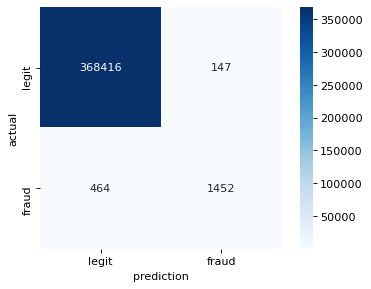

In [34]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('Xgboost_v3')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_xgboost_v3, X_test_subset_1hot_hour, y_predict)

ROC AUC score =  0.9982780503722075


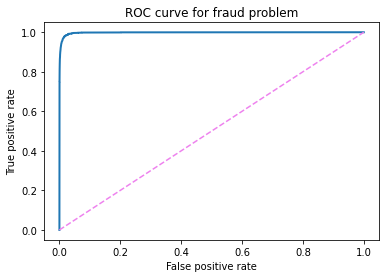

In [34]:
# plot ROC AUC curve
# from class notes
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf_xgboost_v3.predict_proba(X_test_subset_1hot_hour)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, clf_xgboost_v3.predict_proba(X_test_subset_1hot_hour)[:,1]))

In [ ]:
################ BEST RUN ABOVE using 1-hot encoding of 'category' and the new feature (hour) ################

In [35]:
# create a dataset with the minimum important features

X_train_subset_hour_ft_min = X_train_subset_1hot_hour.copy()
X_test_subset_hour_ft_min = X_test_subset_1hot_hour.copy()
X_train_subset_hour_ft_min.drop(['lat', 'long','city_pop', 'merch_lat', 'merch_long', 'unix_time'], axis=1, inplace=True)
X_test_subset_hour_ft_min.drop(['lat', 'long','city_pop', 'merch_lat', 'merch_long', 'unix_time'], axis=1, inplace=True)


#X_train_subset_hour_ft_min.pop('unix_time')
X_train_subset_hour_ft_min.head()
X_test_subset_hour_ft_min.head()

amt    0    1    2    3    4    5    6    7    8    9   10   11  \
17312      1.74  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
934753     1.20  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1071802  111.27  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1074085    1.59  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
288593   174.79  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          12   13  hour  
17312    0.0  1.0    13  
934753   0.0  0.0    15  
1071802  0.0  0.0    13  
1074085  0.0  0.0    13  
288593   0.0  0.0    23

In [513]:
# Rerun xgboost with min feature set ()'category' one-hot encoded and the newly created 'hour' features)

# fit model no training data
clf_xgboost_v4 = XGBClassifier()
clf_xgboost_v4.fit(X_train_subset_hour_ft_min, y_train)

y_predict = clf_xgboost_v4.predict(X_test_subset_hour_ft_min)

  Xgboost_v4 Performance Metrics 
Accuracy: 0.997941
Precision: 0.857852
Recall: 0.721294
F1 score: 0.783669
AUC score: 0.860337
LTPFR (fp/(fp+tn): 0.062%


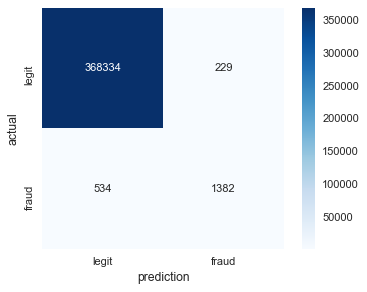

In [514]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('Xgboost_v4')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_xgboost_v4, X_test_subset_hour_ft_min, y_predict)

In [ ]:
########################## Over sampling section ############################

In [36]:
# Apply one-hot encoder to selected 'category' categorical feature

# create new df with needed features ('category')
X_train_subset_3 = pd.concat([X_train_subset_cat['category'], X_train_subset_hour_ft], axis=1)
X_test_subset_3 = pd.concat([X_test_subset_cat['category'], X_test_subset_hour_ft], axis=1)
X_test_subset_3

category     amt      lat      long  city_pop  merch_lat  \
17312           travel    1.74  29.3641  -98.4924   1595797  28.456118   
934753            home    1.20  39.9914  -80.4408       724  40.700515   
1071802    food_dining  111.27  37.0581  -86.1938      6841  37.569864   
1074085  personal_care    1.59  27.2625  -80.3793    181438  27.349826   
288593   entertainment  174.79  34.7789  -86.5438    190178  34.775454   
...                ...     ...      ...       ...       ...        ...   
310600    shopping_pos    6.83  33.4629  -86.7904    493806  34.081105   
742754            home   74.24  41.0552 -110.1603        49  41.609937   
1160558    food_dining   47.79  40.0897  -74.9781   1526206  39.607133   
1107319    food_dining   13.02  40.6866  -92.6833      1132  40.897487   
1229501       misc_pos   24.40  32.3836  -94.8653     24536  31.701074   

         merch_long   unix_time  hour  
17312    -98.491336  1372338223    13  
934753   -80.192342  1357486400    15  
1071802  -87.014661  1363872725    13  
1074085  -79.765397  1363959253    13  
288593   -86.146634  1337643401    23  
...             ...         ...   ...  
310600   -87.387263  1338392906    15  
742754  -109.797100  1352838731    20  
1160558  -75.805622  1367175572    18  
1107319  -93.305398  1365205082    23  
1229501  -94.533869  1369738405    10  

[370479 rows x 9 columns]

In [37]:
# Over sample the dataset using a 2:1 rtio of neg/pos classes

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 100, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=10) 

# create the over sampled dataset
X_train_os, y_train_os = ROS.fit_resample(X_train_subset_3, y_train)

In [38]:
# check we have the correct shapes

X_train_os.value_counts()
y_train_os.value_counts()

print(X_train_os.shape)
print(y_train_os.shape)

X_train_os.head()

(2247680, 9)
(2247680,)


category     amt      lat     long  city_pop  merch_lat  merch_long  \
0  gas_transport   87.15  44.5232 -86.2061       680  44.540988  -86.279478   
1       misc_net  910.52  36.8347 -84.4436      1565  37.767985  -84.800707   
2           home   76.16  40.7320 -73.1000      4056  40.872604  -72.428935   
3      kids_pets  115.83  34.2853 -91.3336      5161  34.857499  -91.229256   
4  personal_care    6.83  41.0442 -73.9609      5950  41.263654  -73.353803   

    unix_time  hour  
0  1347269937     9  
1  1386150400     9  
2  1358539788    20  
3  1366062207    21  
4  1388268829    22

In [39]:
# Apply one-hot encoder to selected 'category' categorical feature

# # creating instance of oneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# convert the category to one hot encoding
one_hot_enc_cols_train_df2 = pd.DataFrame(one_hot_enc.fit_transform(X_train_os[['category']]))

# One-hot encoding has removed the index, so this puts it back
one_hot_enc_cols_train_df2.index = X_train_os.index

# # Remove categorical columns (they have been replaced with one-hot encoding)
X_train_subset_1hot_tmp = X_train_os.drop('category', axis=1)

# Add one-hot encoded columns to the df (both train and test, otherwise predict will fail)
X_train_subset_os_1hot = pd.concat([X_train_subset_1hot_tmp, one_hot_enc_cols_train_df2], axis=1)

X_test_subset_1hot_hour = X_test_subset_1hot_hour[['amt', 'lat', 'long', 'city_pop', 'merch_lat', \
                                                'merch_long', 'unix_time', 'hour', 0, 1, 2, 3, 4, \
                                                     5, 6, 7, 8, 9, 10, 11, 12, 13]]

In [40]:
# Run xgboost with oversampled dateset with 'category' one-hot encoded and 'hour' features

clf_xgboost_os_v6 = XGBClassifier()
clf_xgboost_os_v6.fit(X_train_subset_os_1hot, y_train_os)

y_predict = clf_xgboost_os_v6.predict(X_test_subset_1hot_hour)

[11:24:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  clf_xgboost_os_v6 Performance Metrics 
Accuracy: 0.991543
Precision: 0.374717
Recall: 0.949896
F1 score: 0.537428
AUC score: 0.970828
LTPFR (fp/(fp+tn): 0.824%


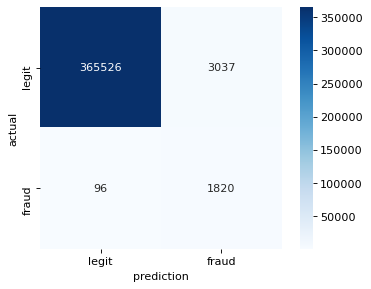

In [41]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('clf_xgboost_os_v6')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_xgboost_os_v6, X_test_subset_1hot_hour, y_predict)

In [ ]:
############################ END Over sampling section ############################

In [44]:
X_test_subset_1hot_hour = X_test_subset_1hot_hour[['amt', 'lat', 'long', 'city_pop', 'merch_lat', \
                                                'merch_long', 'unix_time', 0, 1, 2, 3, 4, \
                                                     5, 6, 7, 8, 9, 10, 11, 12, 13, 'hour']]

In [45]:
#Rerun xgboost with 'category' one-hot encoded and the newly created 'hour' feature
# assign higher class weight to the 'Fraud' to see if it helps

# fit model no training data
clf_xgboost_v9 = XGBClassifier(class_weight = {0: 0, 1: 50})
clf_xgboost_v9.fit(X_train_subset_1hot_hour, y_train)

y_predict = clf_xgboost_v9.predict(X_test_subset_1hot_hour)

[11:39:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:39:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  clf_xgboost_v9 Performance Metrics 
Accuracy: 0.998351
Precision: 0.908068
Recall: 0.757829
F1 score: 0.826174
AUC score: 0.878715
LTPFR (fp/(fp+tn): 0.040%


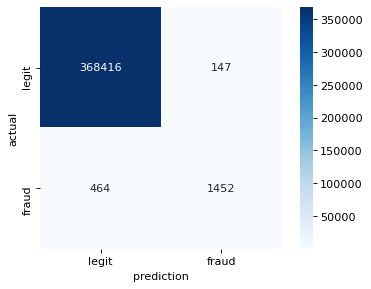

In [46]:
# print metrics

conf_mat = confusion_matrix(y_test, y_predict)

# print of the metrics
print_metrics('clf_xgboost_v9')
print_metrics_LTPFR(conf_mat)

# plot the confusion matrix
make_confusion_matrix(clf_xgboost_v9, X_test_subset_1hot_hour, y_predict)

<a id="80"></a>
<font 
color=blue>
### Section 8. Summary of Findings (Predictive Modeling)
</font>

- The Model accuracy is too high  in the case of Linear Regression -> Too good to be true!


- Linear Regression accuracy is high because the test dataset is imbalanced, so even if we guess that all transactions are legitimate (not fraud), then we will still get high accuracy (99.5%)


- So I need other metrics of model performance, mainly we will use the Precision/Recall/F1 Score in this case due to the imbalanced dataset, and I also use my own metric LTPFR, which I have defned above.


- With that, I find out the Linear Regression Precision/Recall/F1 are all zero, mostly because the True Positive that has been predicted by LR is zero, which means that LR was not able to guess any of the fraud cases...this is a very Bad model.


- Next, we try Random Forests, and as we can see it has a relatively good Precision/Recall and F1 balance.


- I next set PyCaret loose on my data, and PyCaret predicts that KNN was the best model with best Precision/Recall.  Something is wrong here and I will call this the KNN problem!

- to investigate the KNN problem, I use Scikit-learn to invetigate further


- It turns out that KNN when using cc_num, it overfits on this numerical feature, and can then generates very high performance metrics but they are bogus and when removing the cc_num features, KNN as expected under performs.

- I use PyCaret again without cc_num, and now xgboost becomes the best model.

- I now focus on xgboost with feature engineering.

- I one-hot code the 'catgory' feature as it has high feature importance

- I create a new feature, 'hour' as it was seen from EDA that it can be a good feature

- the best model is xgboost with most numerical features (except cc_num) plous 'category' plus 'hour'

- I tried other things like using a minimal set of features, oversampling (2:1), and using class_weights but this did not improve the performance, on the contrarary it was worse.

- in the future, I can use additional feature engineering, such as creating new features that detect when fraudsters first charge minima amount to cc, so they make sure it is a valid one, and then later buy goods.

- I can also a Neural Network to see if it can deliver better performance.